In [1]:
# https://pypi.org/project/audioread/

import librosa
import soundfile as sf
#import ffmpy
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import subprocess
import os

In [2]:
def load_file(filename):
    return librosa.load(glob(filename)[0])

y, sr = load_file("../test.mp3")

In [3]:
def calculate_rms(samples):
    """Given a numpy array of audio samples, return its Root Mean Square (RMS)."""
    return np.sqrt(np.mean(np.square(samples)))
def calculate_desired_noise_rms(clean_rms, snr):
    """
    Given the Root Mean Square (RMS) of a clean sound and a desired signal-to-noise ratio (SNR),
    calculate the desired RMS of a noise sound to be mixed in.
    Based on https://github.com/Sato-Kunihiko/audio-SNR/blob/8d2c933b6c0afe6f1203251f4877e7a1068a6130/create_mixed_audio_file.py#L20
    :param clean_rms: Root Mean Square (RMS) - a value between 0.0 and 1.0
    :param snr: Signal-to-Noise (SNR) Ratio in dB - typically somewhere between -20 and 60
    :return:
    """
    a = float(snr) / 20
    noise_rms = clean_rms / (10**a)
    return noise_rms



In [4]:
def convert_decibels_to_amplitude_ratio(decibels):
    return 10 ** (decibels / 20)

def set_noise(y, noise_rms):
    #amp = convert_decibels_to_amplitude_ratio(decibels)
    #y = np.random.rand(y.shape[0])*amp*2-amp
    noise = np.random.normal(
            0.0, noise_rms, size=y.shape
        )
    return noise

print(y.shape)
y = np.delete(y, np.s_[40000:45000])
print(y.shape)

y[20000:40000] = 0
rms=calculate_rms(y)
noise_rms=calculate_desired_noise_rms(rms,30)
y[20000:40000] = set_noise(y[20000:40000], noise_rms)

(72277,)
(67277,)


<Axes: >

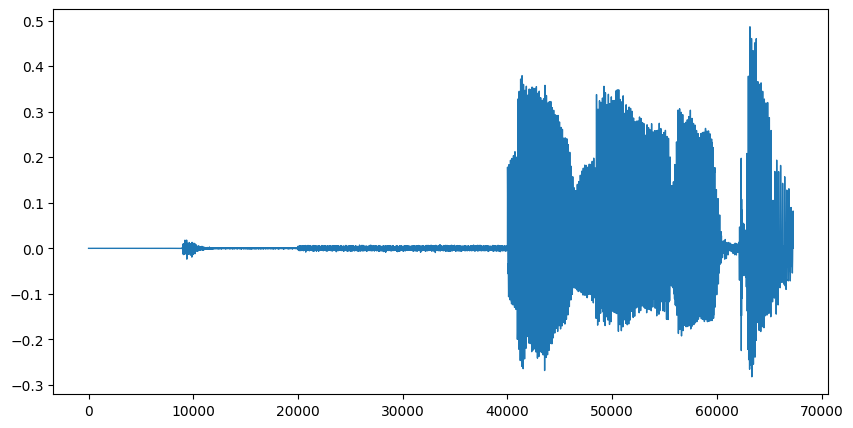

In [5]:
pd.Series(y).plot(figsize=(10, 5), lw=1, title="")

In [6]:
sf.write('out.wav', y, sr, 'PCM_24')

#os.system("ffmpeg -i out.wav out.mp3")

os.system("del out.wav")



0

In [7]:
D = librosa.stft(y)  # STFT of y
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)


<Figure size 640x480 with 0 Axes>

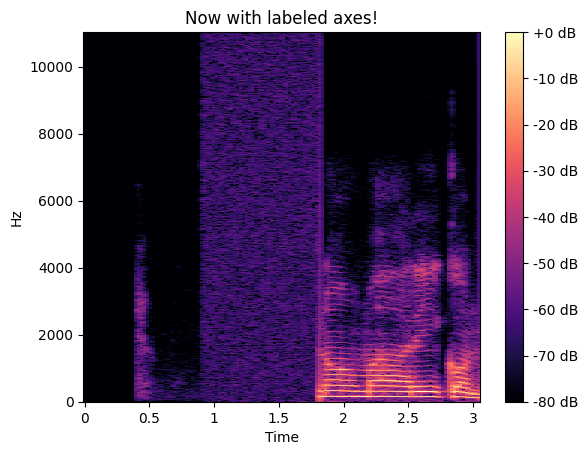

In [8]:
plt.figure()
fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, x_axis='time', y_axis='linear', ax=ax)
ax.set(title='Now with labeled axes!')
fig.colorbar(img, ax=ax, format="%+2.f dB")